[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/mlmed/gifsplanation/blob/main/demo.ipynb)


In [1]:
%matplotlib inline

In [1]:
!pip -q install torchxrayvision captum

In [2]:
!git clone https://github.com/mlmed/gifsplanation

fatal: destination path 'gifsplanation' already exists and is not an empty directory.


In [2]:
import sys,os
sys.path.insert(0,"./gifsplanation/")
sys.path.insert(0,"../torchxrayvision/")
import skimage
import numpy as np
import torch, torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt

In [3]:
import attribution

In [4]:
!wget -q https://mlmed.org/gifsplanation/data/PC-Mass.png

In [5]:
img = skimage.io.imread("PC-Mass.png")
img = xrv.datasets.normalize(img, 255)  

# Check that images are 2D arrays
if len(img.shape) > 2:
    img = img[:, :, 0]
if len(img.shape) < 2:
    print("error, dimension lower than 2 for image")

# Add color channel
img = img[None, :, :]                    

transform = torchvision.transforms.Compose([xrv.datasets.XRayCenterCrop(),
                                            xrv.datasets.XRayResizer(224)])
img = transform(img)
img = image = torch.from_numpy(img).unsqueeze(0)

In [6]:
img.shape

torch.Size([1, 1, 224, 224])

In [7]:
device = "cpu"
if torch.cuda.is_available():
    device = "cuda"
device

'cuda'

In [8]:
ae = xrv.autoencoders.ResNetAE(weights="101-elastic").to(device)
ae

XRV-ResNetAE-101-elastic

In [9]:
model = xrv.models.DenseNet(weights="all").to(device)
model

XRV-DenseNet121-all

In [10]:
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [11]:
target = "Mass"

In [11]:
params = attribution.compute_attribution(img.to(device), "latentshift", model, target, ret_params=True, ae=ae)


[0.67513746] -840 0


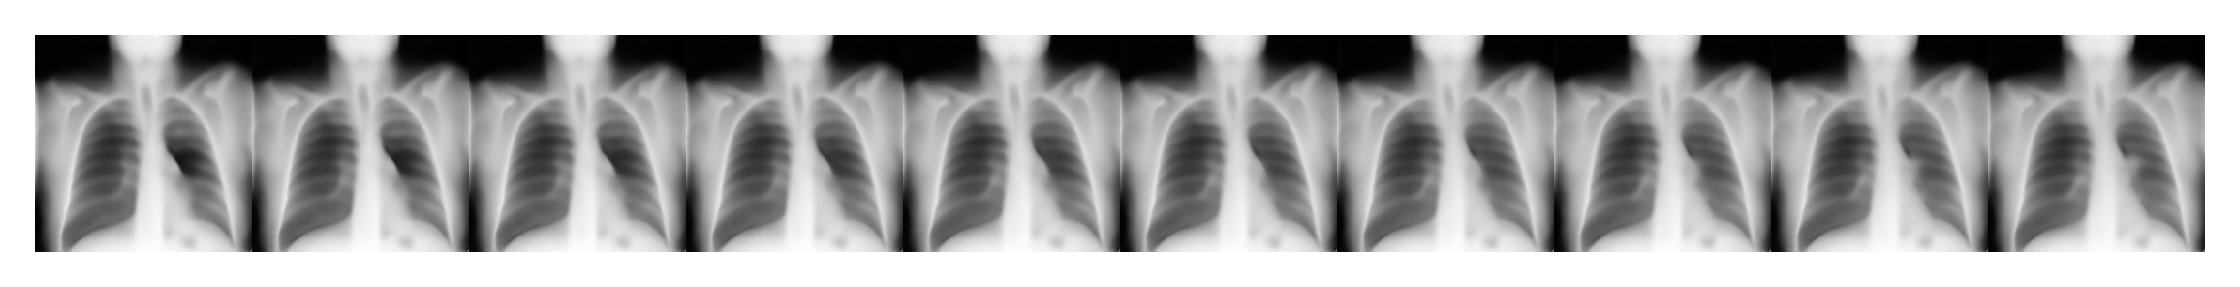

In [12]:
dimgs = np.concatenate(params["dimgs"],1)[0]
fig, ax = plt.subplots(1,1, figsize=(8,3), dpi=350)
plt.imshow(np.concatenate(dimgs,1), interpolation='none', cmap="gray");
plt.axis('off');

In [58]:
%matplotlib inline
attribution.generate_video(image, model, target, ae, target_filename="test", border=False, show=True,
                           ffmpeg_path="/share/software/user/open/ffmpeg/4.2.1/bin/ffmpeg")

[0.67513746] -840 0
0
10
/share/software/user/open/ffmpeg/4.2.1/bin/ffmpeg -loglevel quiet -stats -y -i /tmp/gifsplanation/image-%d-a.png -c:v libx264 -vf scale=-2:224 -profile:v baseline -level 3.0 -pix_fmt yuv420p 'test.mp4'
b''
